In [1]:
from sklearn.datasets import load_boston

boston = load_boston()
dir(boston)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [2]:
class sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)

SyntaxError: invalid syntax (Temp/ipykernel_13168/263906781.py, line 1)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# boston 데이터 세트 로드
boston = load_boston()

# boston 데이터 세트 DataFrame 변환
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)

# boston 데이터 세트의 target 배열은 주택 가격임. 이를 PRICE 컬럼으로 DataFrame에 추가함
bostonDF['PRICE'] = boston.target
print('Boston 데이터 세트 크기 : ', bostonDF.shape)
bostonDF.head()

Boston 데이터 세트 크기 :  (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


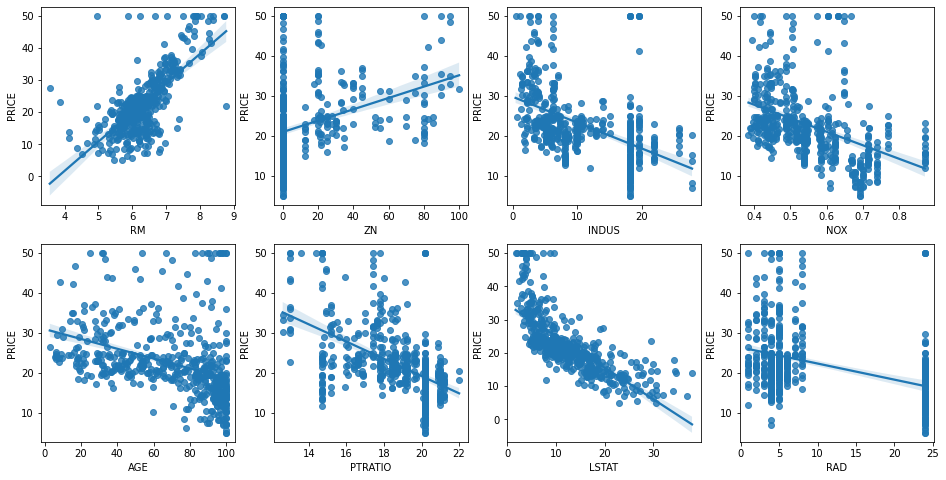

In [8]:
# 2개의 행과 4개의 열을 가진 subplots를 이용, axs는 4x2개의 ax를 가짐
fig, axs = plt.subplots(figsize=(16, 8), ncols=4, nrows=2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])

- 다른 칼럼보다 RM과 LSTAT의 PRICE영향도가 가장 두드러지게 나타남. 
- RM(방 개수)는 양 방향의 선형성이 가장 큼 == 방크기가 클수록 가격이 증가
- LSTAT(하위계층의 비율)은 음의 선형성이 가장 큼
- LSTAT이 적을수록 PRICE가 증가하는 모습

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3,
                                                   random_state=156)

# 선형 회귀 OLS로 학습/예측/평가 수행
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3F}'.format(mse, rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297, RMSE : 4.159
Variance score : 0.757


- LinearRegression으로 생성된 주택가격 모델의 intercept(절편)과 coefficient(회귀계수)값을 보면
- 절편 LineRegression 객체의 intercept_ 속성에 회귀계수 coef_ 속성에 값이 저장돼잇음

In [11]:
print('절편 값 : ', lr.intercept_)
print('회귀 계수값 :',np.round(lr.coef_, 1))

절편 값 :  40.995595172164336
회귀 계수값 : [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


- 책 그만

# 데이터 로딩


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# 보스턴 주택 데이터셋
from sklearn import datasets
housing = datasets.load_boston()

# key값 확인 mport pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 보스턴 주택 데이터셋
from sklearn.datasets import load_boston

housing = load_boston()


# key값 확인
housing.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [16]:
# 판다스 데이터프레임으로 변환
data = pd.DataFrame(housing['data'],columns=housing['feature_names'])
target = pd.DataFrame(housing['target'],columns=['Target'])

# 데이터셋 크기
print(data.shape)
print(target.shape)

(506, 13)
(506, 1)


이전과 동일하게 DataFrame()을 이용해 데이터프레임으로 변환해주었다. 13가지 피처 데이터가 들어있는 2차원구조(506행, 13열)이 됐으며, 목표변수 데이터를 데이터프레임으로 변환하고 열 이름을 'Target'으로 설정했다.

In [17]:
# 데이터프레임 결합
df = pd.concat([data, target], axis=1)
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


data 데이터프레임과 target 데이터프레임을 결합한다. concat()에 axis=1 옵션을 사용해 좌우 방향으로 연결하듯 붙여줬다.

# 데이터 탐색

In [19]:
# 기본 정보
df.info

<bound method DataFrame.info of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  Target  
0       15.3  396.90   4.98  

info()를 사용해 데이터프레임의 기본정보를 확인해봤다. 모든 열이 506개의 유효값을 갖고 있으면, 자료형은 64비트 실수형임을 알 수 있다. 모든 데이터값이 숫자로만 이루어져 있기 때문에, 머신러닝 알고리즘에 바로 입력해 계산이 가능하다.

In [20]:
# 결측값 확인
df.isnull().sum()
# 결측값 없음

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Target     0
dtype: int64

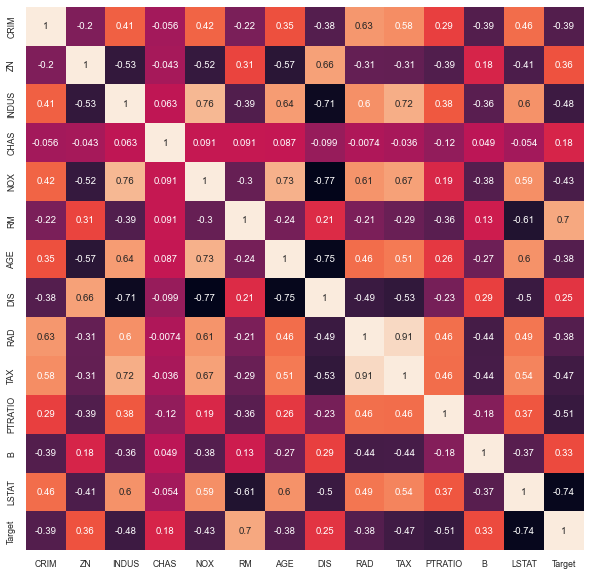

In [21]:
# 상관 관계 분석
# 상관 관계 행렬
df_corr=df.corr()

# 히트맵
plt.figure(figsize=(10,10))
# 10은 사이즈
# 10개가 아님
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
# category bar = 범주같은거
plt.show()

# corr()을 이용해 숫자 데이터를 갖는 변수 간의 상관 계수를 계산했다. 
# heatmap()을 사용해 시각화하였으며, 이미지 크기는 (10,10), 폰트스케일은 0.8로 설정했다. 

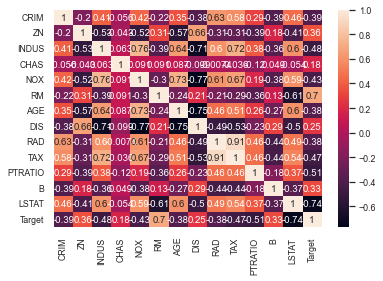

In [23]:
# cmap = sns.light_palette('black', as_cmap =True)
sns.heatmap(df.corr(), annot=True, cbar = True)
plt.show()

In [25]:
# Target 변수와 상관관계가 높은 순으로 출력
corr_order= df.corr().loc[:'LSTAT', 'Target'].abs().sort_values(ascending=False)
corr_order
# abs()로 상관계수의 값을 모두 양수로 변경
# sort_values()에 ascending=False로 내림차순 정렬해줌

LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: Target, dtype: float64

In [26]:
# 시각화로 분석할 피처 선택 추출
plot_cols=['Target', 'LSTAT', 'RM', 'PTRATIO', 'INDUS']
plot_df=df.loc[:, plot_cols]
plot_df.head()

,Target,LSTAT,RM,PTRATIO,INDUS
0,24.0,4.98,6.575,15.3,2.31
1,21.6,9.14,6.421,17.8,7.07
2,34.7,4.03,7.185,17.8,7.07
3,33.4,2.94,6.998,18.7,2.18
4,36.2,5.33,7.147,18.7,2.18


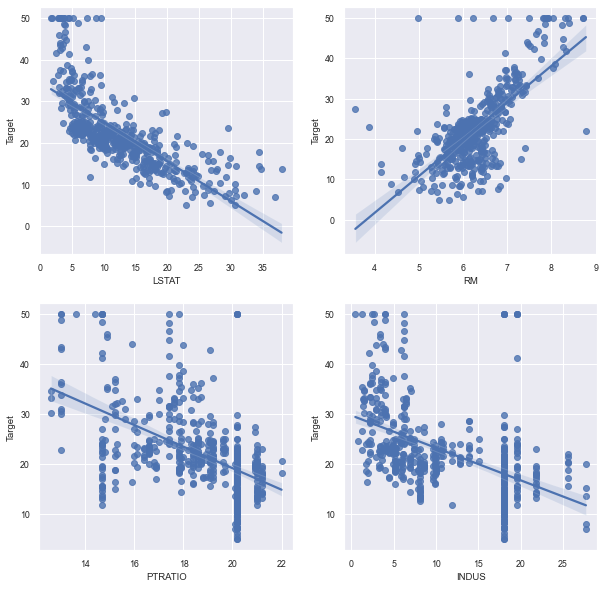

In [27]:
# 이제 데이터분포를 살펴보기위해 시각화
# loc인덱서를 사용
# 형식 : loc[행 인덱스, 열 이름]

# regplot으로 선형회귀선 표시
plt.figure(figsize=(10,10))
for idx, col in enumerate(plot_cols[1:]):
    ax1=plt.subplot(2, 2, idx+1)
    sns.regplot(x=col, y=plot_cols[0], data=plot_df, ax=ax1)
plt.show()

In [28]:
# seaborn의 regplot 함수로 선형 회귀선을 산점도에 표시했다
# x변수에 target빼고 네개 변수넣고 y변수에 target 입력햇음
# subplot()으로 2x2
# 만들어보니 LSTAT과 RM이 선형관계가 뚜렷함

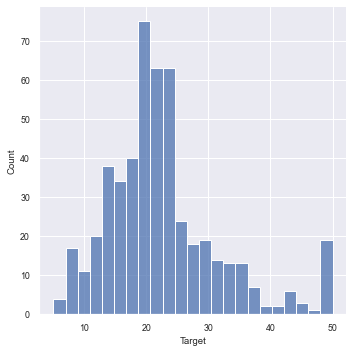

In [30]:
# 목표 변수(Target 열)-주택가격
# Target 데이터 분포
sns.displot(x='Target', kind='hist', data=df)
# 히스토그램으로 출력
plt.show()

In [ ]:
# target열은 20을 중심으로 정규분포 형태임
# 최대값인 50에 많은 데이터가 분포되어 있는 특이점

# 데이터 전처리

In [32]:
# 피처 스케일링
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

df_scaled=df.iloc[:, :-1]
# 마지막 열임을 나타내는 -1은 포함하지 않음
scaler.fit(df_scaled)
df_scaled=scaler.transform(df_scaled)

# 스케일링 변환된 값을 데이터프레임에 반영
df.iloc[:, :-1]=df_scaled[:, :]
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,24.0
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,21.6
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,34.7
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,33.4
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,36.2


In [ ]:
# 사이킷런의 MinMaxScaler를 활용한 정규화방법이다
# 목표변수 target을 제외한 나머지 13개 열의 데이터를 iloc 인덱서로 추출
# 이걸 minmaxscaler 인스턴스 객체에 fit으로 0~1사이값으로 스케일링해서 학습함
# transform을 사용하면 학습한 변환식으로 실제로 적용해서 데이터를 정규화 변환한다

※iloc 인덱서 짚고 넘어가기※

loc인덱서는 인덱스 이름을 사용하지만, iloc 인덱서는 원소의 순서를 나타내는 정수 인덱스(0, 1, 2, ...)를 사용한다. 즉, iloc 인덱서는 행과 열의 위치 순서만 골한다. loc 인덱서는 범위의 끝을 포함하지만, iloc 인덱서는 포함하지 않는다.

In [34]:
# 학습 데이터와 테스트 데이터 분할
from sklearn.model_selection import train_test_split
x_data=df.loc[:, ['LSTAT', 'RM']]
y_data=df.loc[:, 'Target']
x_train, x_test, y_train, y_test=train_test_split(x_data,
                                                 y_data,
                                                 test_size=0.2,
                                                 shuffle=True,
                                                 random_state=12)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

# LSTAT과 RM을 학습데이터 x_data로
# 506개의 주택 샘플중 20% => test_size=0.2
# train_test_split()의 test_size 옵션에 0.2(20%)를 입력하면
# 404개의 학습데이터 x_train, y_train과 102개의 테스트 데이터 x_test, y_test로 분할된다. 

(404, 2) (404,)
(102, 2) (102,)


In [35]:
# 베이스라인 모델 - 선형 회귀 모델
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train, y_train)

print('회귀계수(기울기):', np.round(lr.coef_, 1)) 
# np:numpy, coef_:피처에 대한 회귀계수값
print('상수항(절편):',np.round(lr.intercept_, 1))
# intercept_:상수항(절편) 값

회귀계수(기울기): [-23.2  25.4]
상수항(절편): 16.3


LinearRegression 클래스 객체를 생성하고
fit 메소드에 학습데이터인 x_train. y_train을 입력하면 선형 회귀식을 찾는다.
선형 회귀 모델의 coef_ 속성으로부터 각 피처에 대한 회귀 계수 값(기울기)을 얻고 
intercept_ 속성에서 상수항(절편)값을 얻는다.

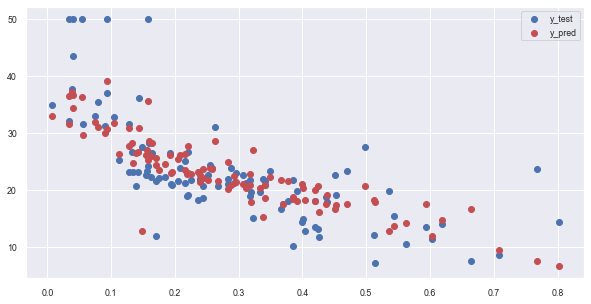

In [37]:
# 예측값 저장
y_test_pred=lr.predict(x_test)

# 예측값과 실제값의 분포
plt.figure(figsize=(10, 5)) # 표 크기 지정
plt.scatter(x_test['LSTAT'], y_test, label='y_test') # 파란점, 실제값
plt.scatter(x_test['LSTAT'], y_test_pred, c='r', label='y_pred') # 빨간점, 예측값
plt.legend(loc='best') # 범례 최적위치에 표시
plt.show()

오차는 꽤 있는 편임
잔차(residuals)가 작을수록 모델의 성능이 좋다

모델 성능 평가할때는 수치화된 성능 지표를 사용한다
회귀모델을 평가하는 지표는 MAE, MSE, RMSE 등이 있다

In [38]:
# 성능 평가
from sklearn.metrics import mean_squared_error
y_train_pred=lr.predict(x_train)

train_mse=mean_squared_error(y_train, y_train_pred) # 훈련 데이터의 평가 점수
print('Train MSE:%.4f' % train_mse)

test_mse=mean_squared_error(y_test, y_test_pred)
print('Test MSE:%.4f' % test_mse)

Train MSE:30.8042
Test MSE:29.5065


mean_squared_error() : 테스트오차를 계산하는 함수
에 테스트 데이터의 실제값(y_test)와 예측값(y_test_pred)입력

비교를 위해 훈련 데이터의 평가 점수인 Train MSE도 계산함
결과는 1에 가까울수록 좋은데 너무 크게 나옴
그래서 